In [5]:
#import dependencies
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from datetime import date

# Twitter API Keys
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

#import and initialise sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# Target Search Term
news_channel = ("@BBC", "@CBSNews", "@CNN","@FoxNews", "@nytimes")

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
compound_score_mean = []

# Variables for holding sentiments
sentiments = []

#Loop through each newschannel items
for channel in news_channel:
    
    # Counter
    counter = 1    
    
    # Variable for holding the oldest tweet
    oldest_tweet = None    
    
     # Loop through 5 times
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.search(channel, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

                # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
                
                # Set the new oldest_tweet value
            oldest_tweet = int(tweet["id_str"]) - 1
                
            #storing the values ina dictionary
            sentiments.append({
                            "Channel": channel,
                            "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter})
        
            # Add to counter 
            counter = counter + 1
            
    #storing the average sentiments in variables
    compound_score = round(np.mean(compound_list),2)
    compound_score_mean.append(compound_score)
    positive_score  = round(np.mean(positive_list),2)
    negative_score = round(np.mean(neutral_list),2)
    neutral_score = round(np.mean(negative_list),2)

In [7]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Channel,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,@BBC,0.0000,Fri Dec 01 04:34:17 +0000 2017,0.000,1.000,0.000,1
1,@BBC,0.0000,Fri Dec 01 04:33:39 +0000 2017,0.000,1.000,0.000,2
2,@BBC,-0.6486,Fri Dec 01 04:32:59 +0000 2017,0.223,0.777,0.000,3
3,@BBC,-0.6705,Fri Dec 01 04:31:45 +0000 2017,0.275,0.644,0.082,4
4,@BBC,0.0000,Fri Dec 01 04:31:11 +0000 2017,0.000,1.000,0.000,5


In [8]:
#plotting 

color = {"@BBC":"cyan", "@CBSNews": "green" , "@CNN": "red","@FoxNews": "blue", "@nytimes":"gold"}
plt.scatter(x= sentiments_pd["Tweets Ago"],y = sentiments_pd["Compound"], s= sentiments_pd["Date"], marker="o", color = color,
         alpha=0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Media Tweets {date.today()}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.ylim(-1,1)
plt.show()

ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' kwarg instead.

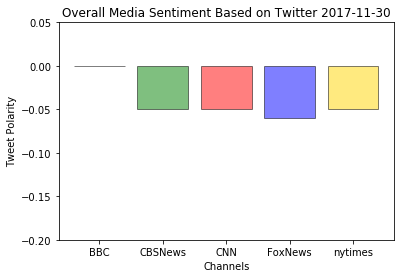

In [9]:
#Plotting bar graph
x_axis = np.arange(len(news_channel))
color = ["cyan","green","red","blue","gold"]
plt.bar(x_axis, compound_score_mean , color= color, alpha=0.5, align="edge", edgecolor = "black")

plt.ylim(-.2, 0.05)

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBSNews", "CNN","FoxNews", "nytimes"])

# Give our chart some labels and a tile
plt.title(f"Overall Media Sentiment Based on Twitter {date.today()}")
plt.xlabel("Channels")
plt.ylabel("Tweet Polarity")

plt.show()